In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Importing modulus from available resource

In [2]:
import tensorflow

Reading the data

In [3]:
df=pd.read_excel("TOTALDATA REAL.xlsx")
df

,IMAGE DERIVED DENSITY,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,BEST THERMAL POROSITY,TOTAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS,,.1
0,2.5059,10.6431,18.4555,0.1919,0.1300,3.8568,0.0,1.0,1.0,0.0000,NaN,NaN
1,2.5460,10.7011,18.8648,0.1862,0.1111,4.9163,0.0,1.0,1.0,0.0000,NaN,NaN
2,2.5642,10.7012,19.3160,0.1830,0.1015,5.7882,0.0,1.0,1.0,0.0000,NaN,NaN
3,2.5808,10.6773,19.6845,0.1739,0.0927,6.8120,0.0,1.0,1.0,0.0000,NaN,NaN
4,2.5632,10.6162,19.4390,0.1547,0.1053,5.4189,0.0,1.0,1.0,0.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4844,2.4938,8.6622,2.9538,0.1388,0.1072,2.4755,0.0,1.0,1.0,2.6704,NaN,NaN
4845,2.4953,8.6795,3.1663,0.1429,0.1064,2.5113,0.0,1.0,1.0,2.6704,NaN,NaN
4846,2.5187,8.7354,3.4114,0.1303,0.0908,3.2910,0.0,1.0,1.0,2.6679,NaN,NaN
4847,2.5254,8.7734,4.0108,0.1365,0.0846,3.6695,0.0,1.0,1.0,2.6641,NaN,NaN


Exploring the data

In [4]:
df.columns

Index(['IMAGE DERIVED DENSITY', 'BEST CALIPER,AVERAGE DIAMETER',
       'IMAGE DERIVED PHOTOELECTRIC FACTOR', 'BEST THERMAL POROSITY',
       'TOTAL POROSITY', 'RESISTIVITY OF WATER FILLED FORMATION',
       'RELATIVE PERMEABILITY TO HYDROCARBON',
       'RELATIVE PERMEABILITY TO WATER', 'WATER CUT',
       'MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS', ' ', ' .1'],
      dtype='object')

Removing extra columns

In [5]:
df0=df.drop([' ', ' .1','BEST THERMAL POROSITY','IMAGE DERIVED DENSITY'],axis=1)

Removing NaN values

In [6]:
df1=df0.replace(-999.25,np.NaN)
df1

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,TOTAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS
0,10.6431,18.4555,0.1300,3.8568,0.0,1.0,1.0,0.0000
1,10.7011,18.8648,0.1111,4.9163,0.0,1.0,1.0,0.0000
2,10.7012,19.3160,0.1015,5.7882,0.0,1.0,1.0,0.0000
3,10.6773,19.6845,0.0927,6.8120,0.0,1.0,1.0,0.0000
4,10.6162,19.4390,0.1053,5.4189,0.0,1.0,1.0,0.0000
...,...,...,...,...,...,...,...,...
4844,8.6622,2.9538,0.1072,2.4755,0.0,1.0,1.0,2.6704
4845,8.6795,3.1663,0.1064,2.5113,0.0,1.0,1.0,2.6704
4846,8.7354,3.4114,0.0908,3.2910,0.0,1.0,1.0,2.6679
4847,8.7734,4.0108,0.0846,3.6695,0.0,1.0,1.0,2.6641


In [7]:
df2=df1.dropna()
df2

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,TOTAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS
0,10.6431,18.4555,0.1300,3.8568,0.0,1.0,1.0,0.0000
1,10.7011,18.8648,0.1111,4.9163,0.0,1.0,1.0,0.0000
2,10.7012,19.3160,0.1015,5.7882,0.0,1.0,1.0,0.0000
3,10.6773,19.6845,0.0927,6.8120,0.0,1.0,1.0,0.0000
4,10.6162,19.4390,0.1053,5.4189,0.0,1.0,1.0,0.0000
...,...,...,...,...,...,...,...,...
4844,8.6622,2.9538,0.1072,2.4755,0.0,1.0,1.0,2.6704
4845,8.6795,3.1663,0.1064,2.5113,0.0,1.0,1.0,2.6704
4846,8.7354,3.4114,0.0908,3.2910,0.0,1.0,1.0,2.6679
4847,8.7734,4.0108,0.0846,3.6695,0.0,1.0,1.0,2.6641


MinMax scaling

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(copy=True)

In [9]:
scaler.fit(df2)

MinMaxScaler()

In [10]:
df3=pd.DataFrame(scaler.transform(df2),index=df2.index, columns=df2.columns)
df3

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,TOTAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS
0,0.329710,0.932446,0.234905,0.033739,0.0,1.0,1.0,0.000000
1,0.338149,0.954944,0.195823,0.043637,0.0,1.0,1.0,0.000000
2,0.338164,0.979745,0.175972,0.051783,0.0,1.0,1.0,0.000000
3,0.334686,1.000000,0.157775,0.061348,0.0,1.0,1.0,0.000000
4,0.325797,0.986506,0.183830,0.048333,0.0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...,...
4844,0.041496,0.080372,0.187758,0.020834,0.0,1.0,1.0,0.897523
4845,0.044013,0.092052,0.186104,0.021168,0.0,1.0,1.0,0.897523
4846,0.052146,0.105525,0.153846,0.028453,0.0,1.0,1.0,0.896683
4847,0.057675,0.138472,0.141026,0.031989,0.0,1.0,1.0,0.895406


In [13]:
Y=df3["TOTAL POROSITY"]
Y

0       0.234905
1       0.195823
2       0.175972
3       0.157775
4       0.183830
          ...   
4844    0.187758
4845    0.186104
4846    0.153846
4847    0.141026
4848    0.126964
Name: TOTAL POROSITY, Length: 4770, dtype: float64

In [14]:
X=df3.drop("TOTAL POROSITY",axis=1)
X

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS
0,0.329710,0.932446,0.033739,0.0,1.0,1.0,0.000000
1,0.338149,0.954944,0.043637,0.0,1.0,1.0,0.000000
2,0.338164,0.979745,0.051783,0.0,1.0,1.0,0.000000
3,0.334686,1.000000,0.061348,0.0,1.0,1.0,0.000000
4,0.325797,0.986506,0.048333,0.0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...
4844,0.041496,0.080372,0.020834,0.0,1.0,1.0,0.897523
4845,0.044013,0.092052,0.021168,0.0,1.0,1.0,0.897523
4846,0.052146,0.105525,0.028453,0.0,1.0,1.0,0.896683
4847,0.057675,0.138472,0.031989,0.0,1.0,1.0,0.895406


traing and testing of model

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [16]:
X.value_counts()

BEST CALIPER,AVERAGE DIAMETER  IMAGE DERIVED PHOTOELECTRIC FACTOR  RESISTIVITY OF WATER FILLED FORMATION  RELATIVE PERMEABILITY TO HYDROCARBON  RELATIVE PERMEABILITY TO WATER  WATER CUT  MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS
0.000000                       0.044908                            0.004553                               0.661660                              0.0007                          0.0296     0.901926                                             1
0.027048                       0.186826                            0.065606                               0.000000                              1.0000                          1.0000     0.912042                                             1
                               0.127236                            0.026849                               0.000000                              1.0000                          1.0000     0.907169                                             1
                               0.1100

In [17]:
Y.value_counts()

1.000000    17
0.175558    12
0.093259    10
0.135649    10
0.154673    10
            ..
0.504756     1
0.324648     1
0.169355     1
0.361456     1
0.047767     1
Name: TOTAL POROSITY, Length: 2063, dtype: int64

In [18]:
X_train.shape

(3339, 7)

In [19]:
Y_train.shape

(3339,)

Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()


In [21]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [22]:
random_pred= model.predict(X_test)

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2= r2_score(Y_test,random_pred)
r2

0.8978868180209035

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
randomforest_rmse=mean_squared_error(Y_test,random_pred,squared=False)
randomforest_rmse

0.05164529549674079

In [27]:
model.score(X_train,Y_train)

0.9867857422583525

In [28]:
model.score(X_test,Y_test)

0.8978868180209035

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

In [30]:
#Random Forest
clf = RandomForestRegressor()
scores = cross_val_score(clf, X, Y, cv=3,scoring='neg_mean_squared_error') # 3-fold cross-validation
print("MSE:"+ str(-scores.mean()))

MSE:0.017221804150157265


Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [32]:
model1.fit(X_train,Y_train)

LinearRegression()

In [33]:
model1.fit(X_train,Y_train)

LinearRegression()

In [34]:
model1.score(X_train,Y_train)

0.6555922627905391

In [35]:
model1.score(X_test,Y_test)

0.5881868325275486

In [36]:
lr_pred= model1.predict(X_test)
r2_lr= r2_score(Y_test,lr_pred)

In [37]:
r2_lr

0.5881868325275486

In [38]:
lr_rmse=mean_squared_error(Y_test,lr_pred,squared=False)
lr_rmse

0.10371461899382907

support vector machine Regression

In [39]:
from sklearn import svm

In [40]:
model2=svm.SVR()

In [41]:
model2.fit(X_train,Y_train)

SVR()

In [42]:
svm_pred= model2.predict(X_test)

In [43]:
svm_r2= r2_score(Y_test,svm_pred)
svm_r2

0.6896543267236865

In [44]:
svm_rmse=mean_squared_error(Y_test,svm_pred,squared=False)
svm_rmse

0.09003527789365681

In [45]:
model2.score(X_test,Y_test)

0.6896543267236865

In [46]:
#SVM
clf = SVR(gamma='scale')
scores = cross_val_score(clf, X, Y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

MSE:0.41692960030997134


In [47]:
from sklearn import linear_model
model4=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)

In [48]:
model4.fit(X_train,Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [49]:
model4.score(X_test,Y_test)

-3.90431852181905e-07

In [50]:
model4.score(X_train,Y_train)

0.0

Decision Tree Regression

In [55]:
from sklearn import tree
model5=tree.DecisionTreeRegressor()

In [56]:
model5.fit(X_train,Y_train)

DecisionTreeRegressor()

In [57]:
model5.score(X_test,Y_test)

0.8163086278245362

In [58]:
model5.score(X_train,Y_train)

1.0

In [59]:
DT_pred= model5.predict(X_test)
r2_DT= r2_score(Y_test,lr_pred)

In [60]:
r2_DT

0.5881868325275486

In [61]:
DT_rmse=mean_squared_error(Y_test,DT_pred,squared=False)
DT_rmse

0.06926825403839007

Bayesian Ridge Regression

In [62]:
from sklearn import linear_model
model6 = linear_model.BayesianRidge()

In [63]:
model6.fit(X_train,Y_train)

BayesianRidge()

In [64]:
model6.score(X_test,Y_test)

0.5888232474309802

In [65]:
model6.score(X_train,Y_train)

0.6555878972194458

In [66]:
BR_pred= model6.predict(X_test)
r2_BR= r2_score(Y_test,lr_pred)

In [67]:
r2_BR

0.5881868325275486

In [68]:
BR_rmse=mean_squared_error(Y_test,BR_pred,squared=False)
BR_rmse

0.10363444786847387

Neural Network Model

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
model7 = MLPClassifier(solver='lbfgs', alpha=1e-5,
               hidden_layer_sizes=(5, 2), random_state=1)

In [73]:
from sklearn.preprocessing import StandardScaler  
model8 = StandardScaler()  

In [74]:
#ANN
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'adam',neurons=32,batch_size=32,epochs=50,activation='relu',patience=5,loss='mse'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, Y,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [75]:
clf = KerasRegressor(build_fn=ANN, verbose=0)
scores = cross_val_score(clf, X, Y, cv=3,scoring='neg_mean_squared_error')
print("MSE:"+ str(-scores.mean()))

<ipython-input-75-1c031944ec5d>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  clf = KerasRegressor(build_fn=ANN, verbose=0)


MSE:0.006068877265166392


In [76]:
#Random Forest
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    #"criterion":['mse','mae']
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, Y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'max_depth': 20, 'n_estimators': 10}
MSE:0.016414378726757512


In [77]:
#SVM
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":[0.01,0.1,1]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, Y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
MSE:0.026473392501152198


In [78]:
#KNN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5,7,10]
}
clf = KNeighborsRegressor()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, Y)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'n_neighbors': 10}
MSE:0.013326971526710802


In [79]:
#Random Search

In [80]:
#Random Forest
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,13),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['mse','mae']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestRegressor(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, Y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Mohit\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Mohit\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Mohit\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

{'criterion': 'mae', 'max_depth': 48, 'max_features': 4, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 62}
MSE:0.008791823156908863


In [81]:
#SVM
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":stats.uniform(0,1)
}
n_iter_search=20
clf = SVR(gamma='scale')
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, Y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

{'C': 16.187174467846642, 'epsilon': 0.37902139643876576, 'kernel': 'rbf'}
MSE:0.025558052822674825


In [82]:
#KNN
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_neighbors': sp_randint(1,20),
}
n_iter_search=10
clf = KNeighborsRegressor()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, Y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

{'n_neighbors': 9}
MSE:0.013273836386383653


In [83]:
#ANN
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop'],
    'activation': ['relu','tanh'],
    'loss': ['mse','mae'],
    'batch_size': [16,32,64],
    'neurons':sp_randint(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':sp_randint(3,20)
}
n_iter_search=10
clf = KerasRegressor(build_fn=ANN, verbose=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, Y)
print(Random.best_params_)
print("MSE:"+ str(-Random.best_score_))

<ipython-input-83-1b52a96e31dc>:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  clf = KerasRegressor(build_fn=ANN, verbose=0)


{'activation': 'relu', 'batch_size': 64, 'epochs': 50, 'loss': 'mse', 'neurons': 50, 'optimizer': 'rmsprop', 'patience': 15}
MSE:0.007674151801388811


In [84]:
model8.fit(X_train)

StandardScaler()

In [85]:
X_train = model8.transform(X_train)

In [86]:
X_test = model8.transform(X_test) 

In [87]:
from matplotlib import pyplot as plt


In [88]:
import seaborn as sns

In [89]:
df2['TOTAL POROSITY'].nunique()

2063

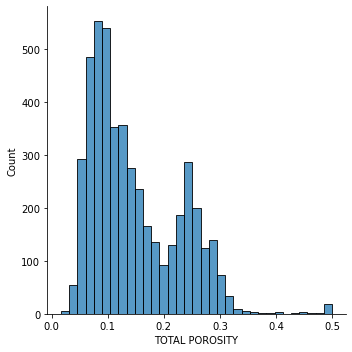

In [90]:
sns.displot(x='TOTAL POROSITY',data=df2)

C:\Users\Mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL POROSITY'>

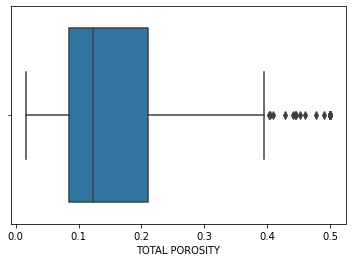

In [91]:
sns.boxplot(df2['TOTAL POROSITY'])

C:\Users\Mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BEST CALIPER,AVERAGE DIAMETER'>

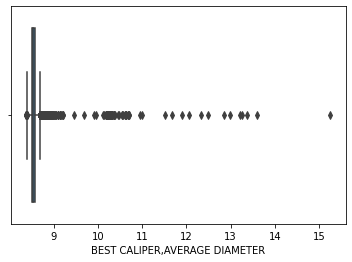

In [92]:
sns.boxplot(df2['BEST CALIPER,AVERAGE DIAMETER'])

C:\Users\Mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IMAGE DERIVED PHOTOELECTRIC FACTOR'>

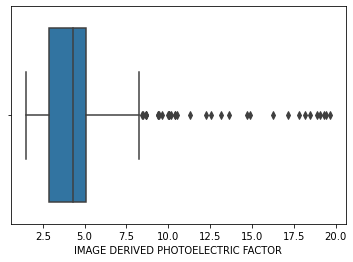

In [93]:
sns.boxplot(df2['IMAGE DERIVED PHOTOELECTRIC FACTOR'])

C:\Users\Mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RESISTIVITY OF WATER FILLED FORMATION'>

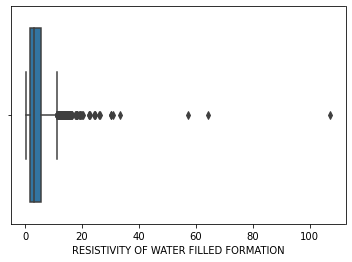

In [94]:
sns.boxplot(df2['RESISTIVITY OF WATER FILLED FORMATION'])

C:\Users\Mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RELATIVE PERMEABILITY TO HYDROCARBON'>

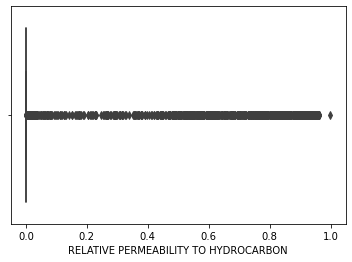

In [95]:
sns.boxplot(df2['RELATIVE PERMEABILITY TO HYDROCARBON'])

C:\Users\Mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RELATIVE PERMEABILITY TO WATER'>

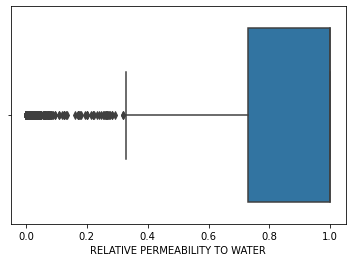

In [96]:
sns.boxplot(df2['RELATIVE PERMEABILITY TO WATER'])

C:\Users\Mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WATER CUT'>

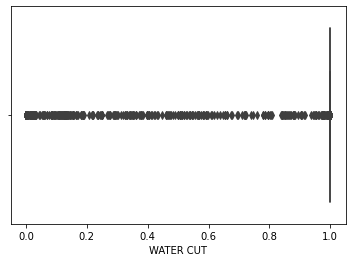

In [97]:
sns.boxplot(df2['WATER CUT'])

C:\Users\Mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS'>

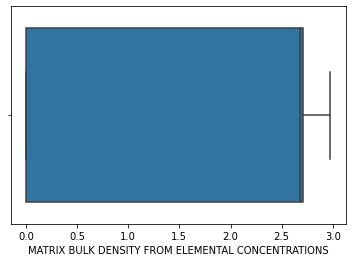

In [98]:
sns.boxplot(df2['MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS'])

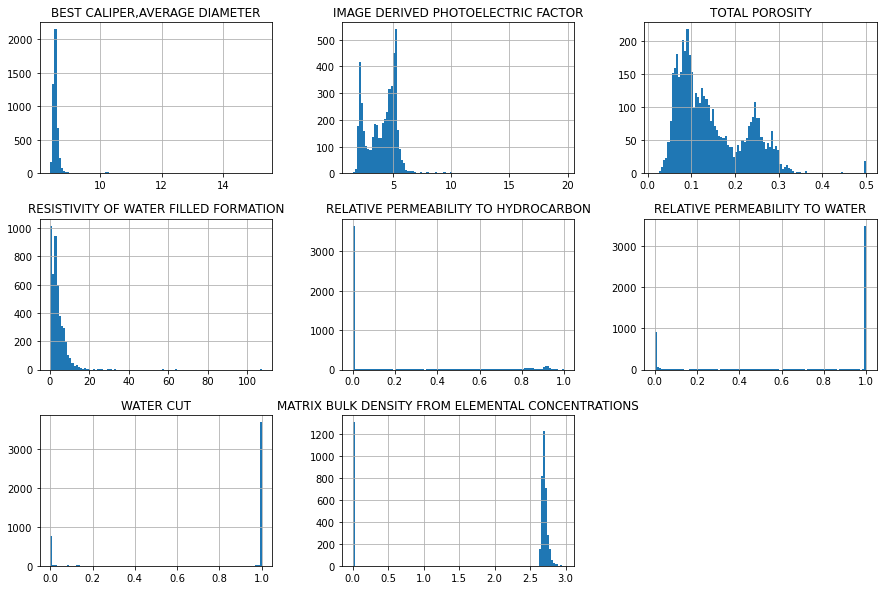

In [99]:
histdf = df2.hist(bins=100,figsize=(15,10))

In [100]:
df2.shape

(4770, 8)

In [101]:
depth_train= np.linspace(2700,3495,len(df2))
df2['Depth']= depth_train

<ipython-input-101-e94fb976dbcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Depth']= depth_train


In [102]:
df2

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,TOTAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS,Depth
0,10.6431,18.4555,0.1300,3.8568,0.0,1.0,1.0,0.0000,2700.000000
1,10.7011,18.8648,0.1111,4.9163,0.0,1.0,1.0,0.0000,2700.166702
2,10.7012,19.3160,0.1015,5.7882,0.0,1.0,1.0,0.0000,2700.333403
3,10.6773,19.6845,0.0927,6.8120,0.0,1.0,1.0,0.0000,2700.500105
4,10.6162,19.4390,0.1053,5.4189,0.0,1.0,1.0,0.0000,2700.666806
...,...,...,...,...,...,...,...,...,...
4844,8.6622,2.9538,0.1072,2.4755,0.0,1.0,1.0,2.6704,3494.333194
4845,8.6795,3.1663,0.1064,2.5113,0.0,1.0,1.0,2.6704,3494.499895
4846,8.7354,3.4114,0.0908,3.2910,0.0,1.0,1.0,2.6679,3494.666597
4847,8.7734,4.0108,0.0846,3.6695,0.0,1.0,1.0,2.6641,3494.833298


<AxesSubplot:ylabel='BEST CALIPER,AVERAGE DIAMETER'>

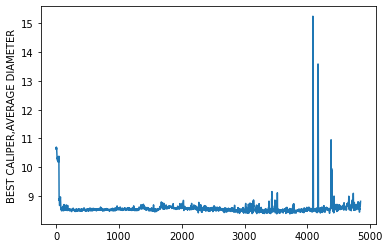

In [103]:
sns.lineplot(data=df2['BEST CALIPER,AVERAGE DIAMETER'])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

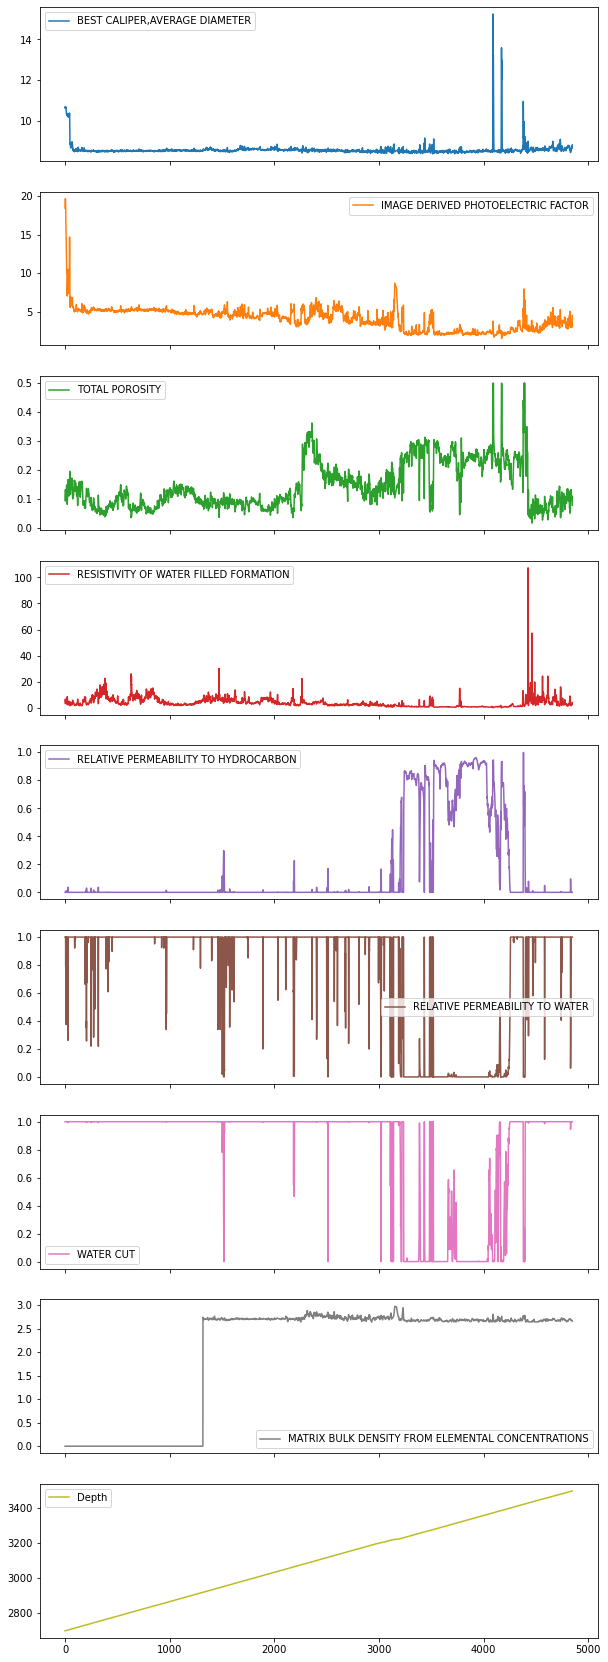

In [104]:
df2.plot(subplots=True,figsize=(10,30))

<AxesSubplot:ylabel='IMAGE DERIVED PHOTOELECTRIC FACTOR'>

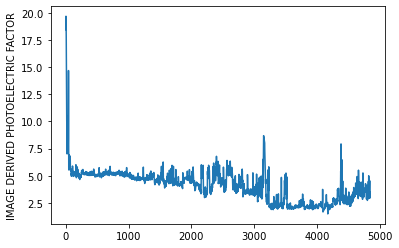

In [105]:
sns.lineplot(data=df2['IMAGE DERIVED PHOTOELECTRIC FACTOR'])

<AxesSubplot:ylabel='RESISTIVITY OF WATER FILLED FORMATION'>

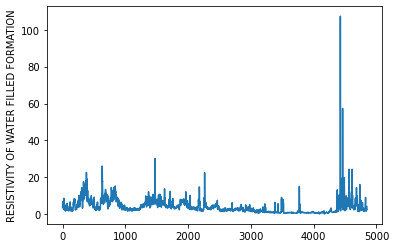

In [106]:
sns.lineplot(data=df2['RESISTIVITY OF WATER FILLED FORMATION'])

<AxesSubplot:ylabel='RELATIVE PERMEABILITY TO HYDROCARBON'>

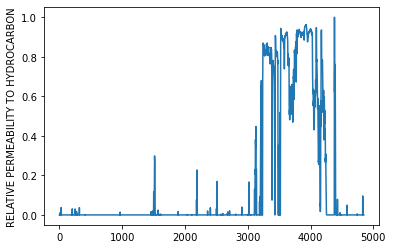

In [107]:
sns.lineplot(data=df2['RELATIVE PERMEABILITY TO HYDROCARBON'])

<AxesSubplot:ylabel='RELATIVE PERMEABILITY TO WATER'>

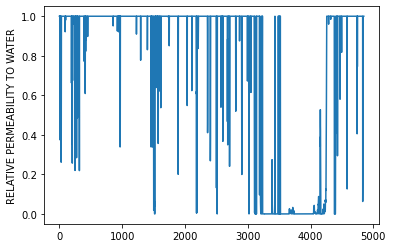

In [108]:
sns.lineplot(data=df2['RELATIVE PERMEABILITY TO WATER'])

<AxesSubplot:ylabel='WATER CUT'>

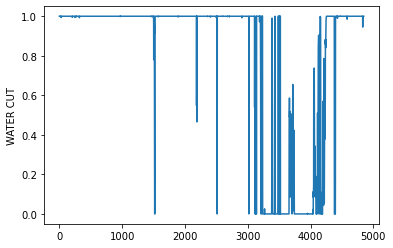

In [109]:
sns.lineplot(data=df2['WATER CUT'])

<AxesSubplot:ylabel='MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS'>

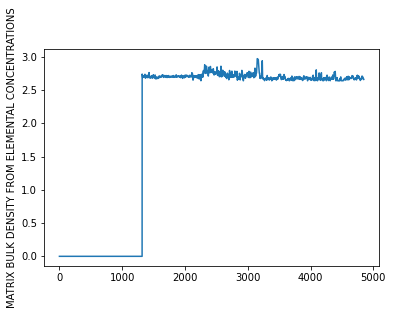

In [110]:
sns.lineplot(data=df2['MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS'])

<AxesSubplot:ylabel='TOTAL POROSITY'>

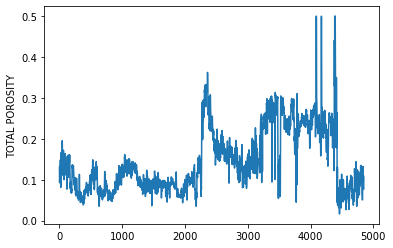

In [111]:
sns.lineplot(data=df2['TOTAL POROSITY'])

In [112]:
df3

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,TOTAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS
0,0.329710,0.932446,0.234905,0.033739,0.0,1.0,1.0,0.000000
1,0.338149,0.954944,0.195823,0.043637,0.0,1.0,1.0,0.000000
2,0.338164,0.979745,0.175972,0.051783,0.0,1.0,1.0,0.000000
3,0.334686,1.000000,0.157775,0.061348,0.0,1.0,1.0,0.000000
4,0.325797,0.986506,0.183830,0.048333,0.0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...,...
4844,0.041496,0.080372,0.187758,0.020834,0.0,1.0,1.0,0.897523
4845,0.044013,0.092052,0.186104,0.021168,0.0,1.0,1.0,0.897523
4846,0.052146,0.105525,0.153846,0.028453,0.0,1.0,1.0,0.896683
4847,0.057675,0.138472,0.141026,0.031989,0.0,1.0,1.0,0.895406


In [113]:
random_predict= model.predict(X_test)

In [114]:
random_predict

array([0.51466294, 0.15205335, 0.54937552, ..., 0.15205335, 0.62394334,
       0.62394334])

In [115]:
Y_test

538     0.177213
668     0.125103
4343    0.494210
3684    0.499793
4508    0.126344
          ...   
4523    0.171836
4811    0.186311
257     0.097808
3609    0.441067
3931    0.514061
Name: TOTAL POROSITY, Length: 1431, dtype: float64

In [116]:
random_predict.shape

(1431,)

In [117]:
preds= np.array(random_pred)

In [118]:
reals= np.array(Y_test)

In [119]:
r2= r2_score(Y_test,random_pred)
r2

0.8978868180209035

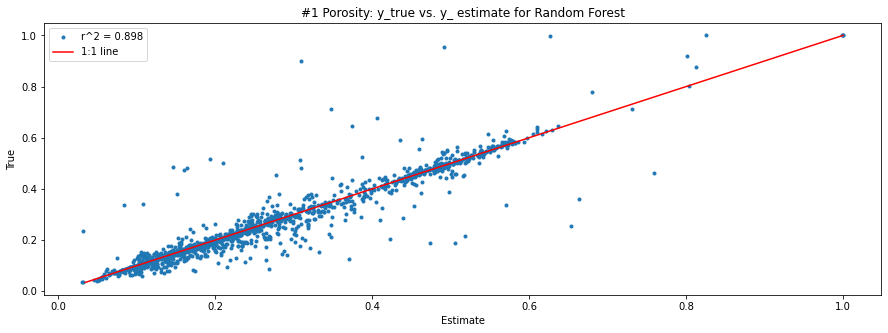

In [120]:
# Plot results:
plt.figure(figsize=(15,5))
i = 0
#plt.subplot(1,2,i+1)
plt.plot(preds, reals, '.', label = 'r^2 = %.3f' % ((r2_score(reals, preds))))
plt.plot([reals.min(),reals.max()],[reals.min(),reals.max()], 'r', label = '1:1 line')
plt.title('#1 Porosity: y_true vs. y_ estimate for Random Forest'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

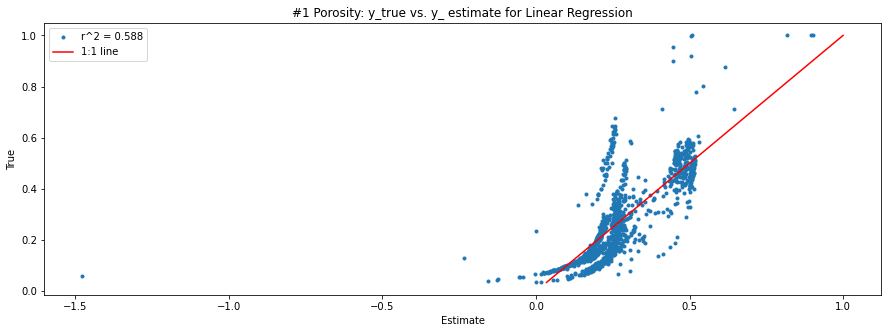

In [121]:
preds= np.array(lr_pred)

# Plot results:
plt.figure(figsize=(15,5))
i = 0
#plt.subplot(1,2,i+1)
plt.plot(preds, reals, '.', label = 'r^2 = %.3f' % ((r2_score(reals, preds))))
plt.plot([reals.min(),reals.max()],[reals.min(),reals.max()], 'r', label = '1:1 line')
plt.title('#1 Porosity: y_true vs. y_ estimate for Linear Regression'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

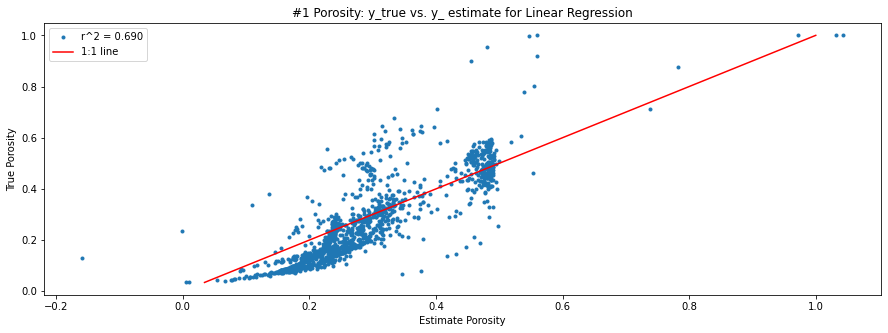

In [122]:
preds= np.array(svm_pred)

# Plot results:
plt.figure(figsize=(15,5))
i = 0
#plt.subplot(1,2,i+1)
plt.plot(preds, reals, '.', label = 'r^2 = %.3f' % ((r2_score(reals, preds))))
plt.plot([reals.min(),reals.max()],[reals.min(),reals.max()], 'r', label = '1:1 line')
plt.title('#1 Porosity: y_true vs. y_ estimate for Linear Regression'); plt.xlabel('Estimate Porosity'); plt.ylabel('True Porosity')
plt.legend()

In [123]:
from matplotlib import pyplot

In [124]:
model.feature_importances_

array([0.06301038, 0.03471694, 0.67924123, 0.01880065, 0.00473705,
       0.00435051, 0.19514324])

In [125]:
corr= df2.corr()

<AxesSubplot:>

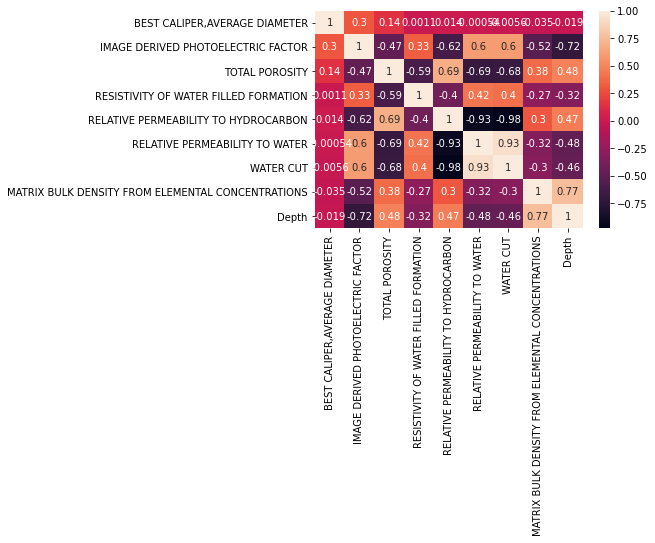

In [126]:
sns.heatmap(corr,annot=True)

Feature: 0, Score: 0.06301
Feature: 1, Score: 0.03472
Feature: 2, Score: 0.67924
Feature: 3, Score: 0.01880
Feature: 4, Score: 0.00474
Feature: 5, Score: 0.00435
Feature: 6, Score: 0.19514


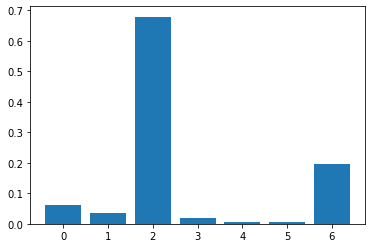

In [127]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [128]:
random_predict

array([0.51466294, 0.15205335, 0.54937552, ..., 0.15205335, 0.62394334,
       0.62394334])